# Get $\gamma$ and $A_+ = A_-$

In [14]:
# variables
psi = var('psi')
tau = var('tau')
k = var('k')
L = var('L')
l = var('l')
v0 = var('v0')
s = var('s')

# system [gamma, A]
system = Matrix([
    
    [(tau*psi + 2)*(tau*psi + 2 - 2 *s*l*v0) - 2,
    -l*((1 - k*l/(1 + (tau*psi)/2)) + (1 + k*l/(1 + (tau*psi)/2))*exp(-k*L))],
    
    [2*((tau*psi + 2) + 1),
    (2/k)*(1 - exp(-k*L))*(1 + 1/(tau*psi + 2))]
    
])

# solution
[[gamma], [A]] = system \ Matrix([[0], [1]])

In [17]:
latex(A)

-\frac{1}{2 \, {\left(\frac{{\left(\psi \tau + 3\right)} {\left({\left(\frac{2 \, k l}{\psi \tau + 2} + 1\right)} e^{\left(-L k\right)} - \frac{2 \, k l}{\psi \tau + 2} + 1\right)} l}{{\left(2 \, l s v_{0} - \psi \tau - 2\right)} {\left(\psi \tau + 2\right)} + 2} + \frac{{\left(\frac{1}{\psi \tau + 2} + 1\right)} {\left(e^{\left(-L k\right)} - 1\right)}}{k}\right)}}

In [18]:
latex(gamma)

\frac{{\left({\left(\frac{2 \, k l}{\psi \tau + 2} + 1\right)} e^{\left(-L k\right)} - \frac{2 \, k l}{\psi \tau + 2} + 1\right)} l}{2 \, {\left({\left(2 \, l s v_{0} - \psi \tau - 2\right)} {\left(\psi \tau + 2\right)} + 2\right)} {\left(\frac{{\left(\psi \tau + 3\right)} {\left({\left(\frac{2 \, k l}{\psi \tau + 2} + 1\right)} e^{\left(-L k\right)} - \frac{2 \, k l}{\psi \tau + 2} + 1\right)} l}{{\left(2 \, l s v_{0} - \psi \tau - 2\right)} {\left(\psi \tau + 2\right)} + 2} + \frac{{\left(\frac{1}{\psi \tau + 2} + 1\right)} {\left(e^{\left(-L k\right)} - 1\right)}}{k}\right)}}

# Plot $\Phi(\Lambda)$

In [2]:
def f(Phi, Lambda):
    
    if Lambda == 0: return 0
    
    if Lambda > 0:
        return coth(sqrt(Phi))/sqrt(Phi) - 1/Lambda
    if Lambda < 0:
        return cot(sqrt(abs(Phi)))/sqrt(abs(Phi)) + 1/Lambda

In [3]:
x = var('x')

def Gamma(Lambda):
    
    if Lambda == 0: return 1 # wild guess
    
    if Lambda > 0: return find_root(f(x, Lambda), 0, 1e4)/Lambda
    
    if Lambda < 0: return find_root(f(x, Lambda), -10, 0)/Lambda

## Test plots

In [4]:
from active_work.plot import list_colormap

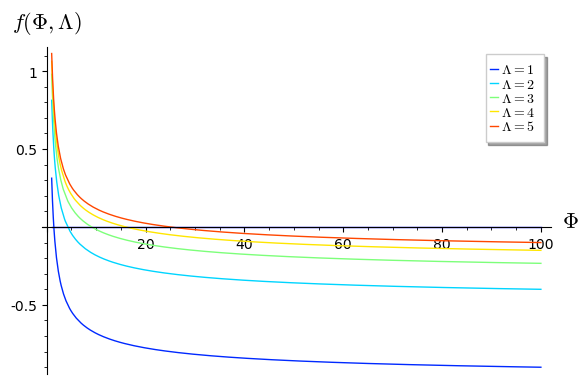

In [5]:
_Lmbd = [1, 2, 3, 4, 5]
colors = list_colormap(_Lmbd, sort=True)

p = plot(lambda _: f(_, 0), (x, 1, 100))
for i in _Lmbd:
    p += plot(lambda _: f(_, i), (x, 1, 100),
            rgbcolor=colors[i][:-1], legend_label=r'$\Lambda=%i$' % i,
              axes_labels=[r'$\Phi$', r'$f(\Phi, \Lambda)$'])
p

## Plot

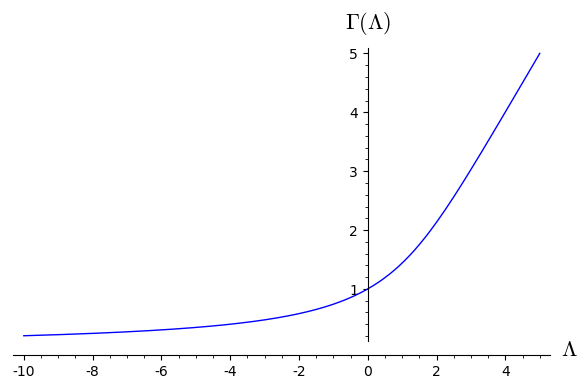

In [7]:
p = plot(Gamma, (x, -10, 5),
    axes_labels=[r'$\Lambda$', r'$\Gamma(\Lambda)$'])
p

In [10]:
p.save('gamma.eps')
p.save('gamma.svg')